# 随机森林1（分类）

## 1 集成算法概述

集成学习（ensemble learning）是时下非常流行的机器学习算法，它本身不是一个单独的机器学习算法，而是通过在数据上构建多个模型，集成所有模型的建模结果。基本上所有的机器学习领域都可以看到集成学习的身影，在现实中集成学习也有相当大的作用，它可以用来做市场营销模拟的建模，统计客户来源，保留和流失，也可用来预测疾病的风险和病患者的易感性。在现在的各种算法竞赛中，随机森林，梯度提升树（GBDT），Xgboost等集成算法的身影也随处可见，可见其效果之好，应用之广。

多个模型集成成为的模型叫做集成评估器（ensemble estimator），组成集成评估器的每个模型都叫做基评估器（base estimator）。通常来说，有三类集成算法：装袋法（Bagging），提升法（Boosting）和stacking。

![image.png](https://pic4.zhimg.com/80/v2-dd9c194119f24b35b478b4262cad54db_720w.jpg)

装袋法的核心思想是构建多个**相互独立的评估器**，然后对其预测进行平均或多数表决原则来决定集成评估器的结果。装袋法的代表模型就是随机森林。

提升法中，**基评估器是相关的**，是按顺序一一构建的。其核心思想是结合弱评估器的力量一次次对难以评估的样本进行预测，从而构成一个强评估器。提升法的代表模型有Adaboost和梯度提升树。

## 2 sklearn中的集成算法

- sklearn中的集成算法模块**ensemble**

## RandomForestClassifier

**老的参数：criterion、max_depth、min_samples_leaf、min_samples_split、max_features、min_impurity_decrease，可见前面决策树**

**新的参数如下：**

**n_estimators**

这是森林中树木的数量，即基基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，**n_estimators越大，模型的效果往往越好**。但是相应的，任何模型都有决策边界，n_estimators达到一定的程度之后，随机森林的精确性往往不在上升或开始波动，并且，n_estimators越大，需要的计算量和内存也越大，训练的时间也会越来越长。对于这个参数，我们是渴望在训练难度和模型效果之间取得平衡。

n_estimators的默认值在现有版本的sklearn中是10，但是在即将更新的0.22版本中，这个默认值会被修正为100。这个修正显示出了使用者的调参倾向：要更大的n_estimators。

树模型的优点是简单易懂，可视化之后的树人人都能够看懂，可惜随机森林是无法被可视化的。所以为了更加直观地让大家体会随机森林的效果，我们来进行一个随机森林和单个决策树效益的对比。我们依然使用红酒数据集。

**1、导入我们需要的包与数据集**

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [8]:
wine = load_wine()
wine.data.shape

(178, 13)

In [3]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**2、复习:sklearn建模的基本流程**

In [10]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

#实例化
#训练及代入实例化后的模型去进行训练，使用的接口是fit
#使用其他接口将测试集导入我们训练好后的模型，去获取我们希望获取的结果(score,Y_test)
clf = DecisionTreeClassifier(random_state=20)
rfc = RandomForestClassifier(random_state=20)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print("Single Tree:{}".format(score_c)
      ,"Random Forest:{}".format(score_r)
     ) 

Single Tree:0.9444444444444444 Random Forest:0.9814814814814815


**3、画出随机森林和决策树在十组交叉验证下的效果对比**

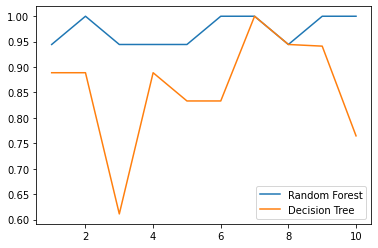

In [7]:
#带大家复习一下交叉验证
#交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label = "Random Forest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

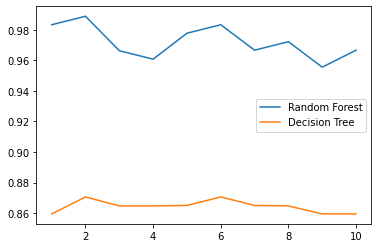

In [8]:
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

#是否有注意到，单个决策树的波动轨迹和随机森林一致？
#再次验证了我们之前提到的，单个决策树的准确率越高，随机森林的准确率也会越高

**4、n_estimators的学习曲线**

0.9888888888888889 28


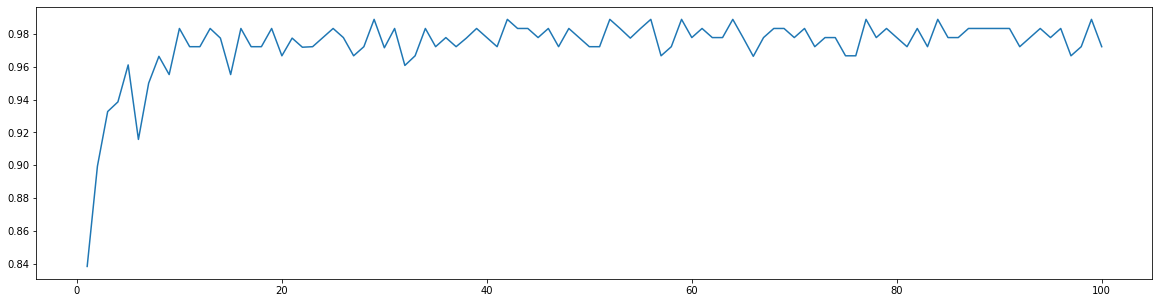

In [12]:
superpa = []
for i in range(100):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,101),superpa)
plt.show()

#list.index(object)  ---> 对象object在列表list当中的索引

## random_state

In [13]:
import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [18]:
rfc = RandomForestClassifier(n_estimators=25,random_state=20)
rfc = rfc.fit(Xtrain, Ytrain)

In [19]:
#随机森林的重要属性之一：estimators_，查看森林中的树的状况
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=378518883),
 DecisionTreeClassifier(max_features='auto', random_state=1663920602),
 DecisionTreeClassifier(max_features='auto', random_state=1708167439),
 DecisionTreeClassifier(max_features='auto', random_state=1951685855),
 DecisionTreeClassifier(max_features='auto', random_state=1681611676),
 DecisionTreeClassifier(max_features='auto', random_state=1942519002),
 DecisionTreeClassifier(max_features='auto', random_state=1356511625),
 DecisionTreeClassifier(max_features='auto', random_state=521790868),
 DecisionTreeClassifier(max_features='auto', random_state=154144587),
 DecisionTreeClassifier(max_features='auto', random_state=602822422),
 DecisionTreeClassifier(max_features='auto', random_state=823592519),
 DecisionTreeClassifier(max_features='auto', random_state=1934675106),
 DecisionTreeClassifier(max_features='auto', random_state=1626422240),
 DecisionTreeClassifier(max_features='auto', random_state=742452342),
 DecisionTre

In [20]:
rfc.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=378518883)

In [21]:
type(rfc.estimators_[0])

sklearn.tree._classes.DecisionTreeClassifier

In [22]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

378518883
1663920602
1708167439
1951685855
1681611676
1942519002
1356511625
521790868
154144587
602822422
823592519
1934675106
1626422240
742452342
79503912
176838101
678396378
1467049754
832580347
1359590355
1169590032
1213377277
938905318
1010465510
1215491262


我们可以观察到，当random_state固定时，随机森林中生成是一组固定的树，但每棵树依然是不一致的，这是用“随机挑选特征进行分支”的方法得到的随机性，并且我们可以证明，当这种随机性越大的时候，袋装法的效果一般会越来越好。**用袋装法集成时，基分类器应当是相互独立的，是不相同的。**<br>
<br>
但这种做法的局限性是很强的，当我们需要成千上万颗树的时候，数据不一定能够提供成千上万的特征来让我们构筑尽量多尽量不同的树。因此，除了random_state，我们还需要其他的随机性。

## bootstrap & oob_score

要让基分类器尽量都不一样，一种很容易理解的方法是使用不同的训练集来进行训练，而袋装法正是通过**有放回的随机抽样技术**来形成不同的训练数据，bootstrap就是用来控制抽样技术的参数。

**bootstrap参数默认True，代表采用这种有放回的随机抽样技术。**通常，这个参数不会被我们设置为False。

然而有放回抽样也会有自己的问题。由于是有放回，一些样本可能在同一个自助集中出现多次，而其他一些却可能被忽略，一般来说，自助集大约平均会包含63%的原始数据。因为每一个样本被抽到某个自助集中的概率为：1-(1-1/n)^n<br>
当n足够大时，这个概率收敛于1-(1/e),约等于0.632.因此，会有约37%的训练数据被浪费掉，没有参与建模，这些数据被称为袋外数据（out of bag data，简写为oob）。除了我们最开始就划分好的测试集之外，这些数据也可以被用来作为集成算法的测试集。**也就是说，在使用随机森林时，我们可以不用划分测试集与训练集，只需要用袋外数据来测试我们的模型即可。** 当然，这也不是绝对的，当n和n_estimators都不够大的时候，很可能就没有数据掉落在袋外，自然也就无法使用oob数据来测试模型了。

In [ ]:
(1/n)^n #一个自助集中，n次抽样时都抽到这个样本的概率

In [ ]:
#一个自助集里，只要有n次中有一次抽到这个样本买这个样本就算是被抽到

In [ ]:
(1/n)^2 * (1-1/n)^(n-2)

In [ ]:
#在一个自助集里，样本永远不会被抽到的概率是 （逆向思维）
1-(1-1/n)^n

如果希望用袋外数据来测试，则需要在实例化时就将oob_score这个参数调整为True，训练完毕之后，我们可以用随机森林的另一个重要属性：oob_score_来查看我们在袋外数据上的测试的结果：

In [4]:
#无需划分测试集与训练集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

In [5]:
#重要属性：oob_score_
rfc.oob_score_

0.9775280898876404

总结：（四个参数）<br>
n_estimators：森林中树的数量<br>
random_state：生成一个固定的森林的模式的一个控制随机性的参数<br>
bootstrap：控制有放回抽样<br>
oob_score：用袋外数据来做测试的参数

## 重要属性和接口

**属性：.estimators  .oob_score_  .feature_importances_**<br>
**接口：apply fit predict score**

In [11]:
#大家可以分别取尝试一下这些属性和接口

rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)

In [12]:
rfc.score(Xtest,Ytest)

0.9814814814814815

In [13]:
rfc.feature_importances_  #zip

array([0.21109352, 0.04613711, 0.02786294, 0.01598686, 0.02474469,
       0.06561203, 0.17961568, 0.00951975, 0.02642971, 0.18889431,
       0.04067419, 0.07012789, 0.09330131])

In [14]:
rfc.apply(Xtest) #返回测试集中的每一个样本在每一颗树中的叶子节点的索引

array([[ 6,  2,  6, ...,  5, 16,  5],
       [16, 10, 18, ...,  9, 16, 20],
       [ 6,  2,  6, ...,  5, 16,  5],
       ...,
       [ 7,  7,  3, ..., 16,  5, 10],
       [11, 10, 18, ...,  9, 18, 20],
       [ 6,  2,  6, ...,  5, 14,  5]], dtype=int64)

In [15]:
rfc.predict(Xtest)

array([1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       1, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 1,
       1, 0, 0, 1, 1, 2, 1, 2, 0, 1])

In [16]:
rfc.predict_proba(Xtest) #分到每一个标签的概率

array([[0.  , 1.  , 0.  ],
       [0.88, 0.12, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.92, 0.08],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.6 , 0.4 , 0.  ],
       [0.16, 0.36, 0.48],
       [0.  , 1.  , 0.  ],
       [0.  , 0.16, 0.84],
       [0.  , 1.  , 0.  ],
       [0.  , 0.2 , 0.8 ],
       [0.12, 0.2 , 0.68],
       [0.32, 0.64, 0.04],
       [0.96, 0.04, 0.  ],
       [0.  , 0.24, 0.76],
       [0.96, 0.04, 0.  ],
       [0.  , 0.04, 0.96],
       [0.96, 0.04, 0.  ],
       [0.08, 0.68, 0.24],
       [0.  , 0.12, 0.88],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.88, 0.12, 0.  ],
       [0.08, 0.88, 0.04],
       [0.08, 0.28, 0.64],
       [0.04, 0.16, 0.8 ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.32, 0.68],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.72, 0.28, 0.  ],
       [0.  , 0.08, 0.92],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
 

# Bagging的另一个必要条件

即：基分类器的判断准确率至少要超过50%

画出基分类器的误差率与随机森林的误差率之间的图像

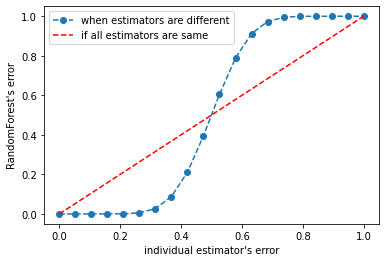

In [22]:
import numpy as np 
from scipy.special import comb

x = np.linspace(0,1,20)
y=[]

for eplsion in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(eplsion**i)*((1-eplsion)**(25-i))
                  for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o--",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show() 